In [1]:

import pandas as pd 
import re
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn2, venn2_circles
from matplotlib import rc,figure
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud
import collections
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/dhanu/Documents/Gold_Challenge/data/data.csv', encoding = 'latin-1')
kamus_alay = pd.read_csv('C:/Users/dhanu/Documents/Gold_Challenge/data/new_kamusalay.csv', encoding = 'latin-1')
data_baru = pd.read_csv('C:/Users/dhanu/Documents/Gold_Challenge/data/file_output6.csv', encoding = 'latin-1')
df_w_abusive = pd.read_csv('C:/Users/dhanu/Documents/Gold_Challenge/data/data_cleansed_w_abusive.csv', encoding = 'latin-1')
abusive = list(pd.read_csv('data/abusive.csv', encoding='latin-1', sep=',')['ABUSIVE'])


In [3]:
kamus_alay.head()

anakjakartaasikasik anak jakarta asyik asyik
0        pakcikdahtua        pak cik sudah tua
1      pakcikmudalagi        pak cik muda lagi
2         t3tapjokowi             tetap jokowi
3                  3x                tiga kali
4              aamiin                     amin

In [4]:
df.head()

Tweet  HS  Abusive  \
0  - disaat semua cowok berusaha melacak perhatia...   1        1   
1  RT USER: USER siapa yang telat ngasih tau elu?...   0        1   
2  41. Kadang aku berfikir, kenapa aku tetap perc...   0        0   
3  USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...   0        0   
4  USER USER Kaum cebong kapir udah keliatan dong...   1        1   

   HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Physical  HS_Gender  \
0              1         0            0        0            0          0   
1              0         0            0        0            0          0   
2              0         0            0        0            0          0   
3              0         0            0        0            0          0   
4              0         1            1        0            0          0   

   HS_Other  HS_Weak  HS_Moderate  HS_Strong  
0         1        1            0          0  
1         0        0            0          0  
2         0        0            0          0  
3         0        0            0          0  
4         0        0            1          0

In [5]:
kamus_alay = kamus_alay.rename(columns={
    'anakjakartaasikasik':'original',
    'anak jakarta asyik asyik':'replace'
})

In [6]:
alay_dict = dict(zip(kamus_alay['original'], kamus_alay['replace']))


In [7]:
def remove_kata_alay(text):
    return ' '.join([alay_dict[word] if word in alay_dict else word for word in text.split(' ')])


In [8]:
for text in df['Tweet']:
    print(remove_kata_alay(text))
    

- di saat semua cowok berusaha melacak perhatian gue. kamu lantas remehkan perhatian yang gue kasih khusus ke elo. basic kamu cowok bego ! ! !'
RT USER: USER siapa yang telat memberi tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga'
41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu meninggalkan aku sendirian. Ketika orang tuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter
USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'
USER USER Kaum cebong kafir sudah kelihatan dongoknya dari awal tambah dungu lagi hahahah'
USER Ya bani taplak dan kawan kawan \xf0\x9f\x98\x84\xf0\x9f\x98\x84\xf0\x9f\x98\x84'
deklarasi pilihan kepala daerah 2018 aman dan anti hoaks warga dukuh sari jabon
Gue baru saja selesai re-watch Aldnoah Zero!!! paling kampret memang endingnya! 2 karakter utama cowoknya kena friendzone bray! XD URL
Nah admi

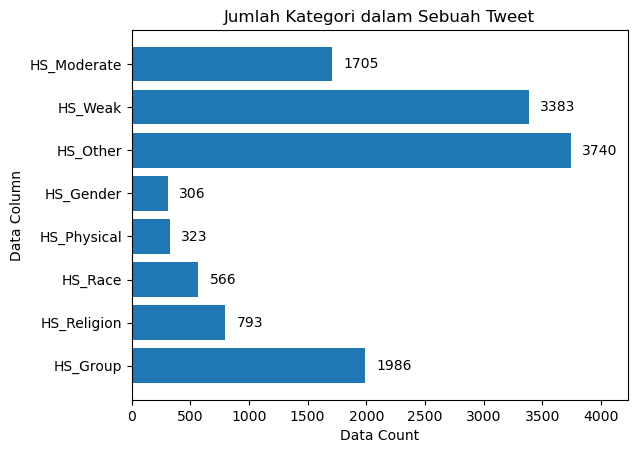

In [9]:
df_category= df.iloc[:,4:-1]
category_count = {}
for category in df_category:
    category_count[category]=df_category[category].sum()

category_count
plt.barh(list(category_count.keys()), list(category_count.values()),
         color=['tab:blue'])

# Add labels and title
for i, v in enumerate(list(category_count.values())):
    plt.text(v + 100, i, str(v), ha='left', va='center')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)
plt.xlabel("Data Count")
plt.ylabel("Data Column")
plt.title("Jumlah Kategori dalam Sebuah Tweet")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13169 entries, 0 to 13168
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          13169 non-null  object
 1   HS             13169 non-null  int64 
 2   Abusive        13169 non-null  int64 
 3   HS_Individual  13169 non-null  int64 
 4   HS_Group       13169 non-null  int64 
 5   HS_Religion    13169 non-null  int64 
 6   HS_Race        13169 non-null  int64 
 7   HS_Physical    13169 non-null  int64 
 8   HS_Gender      13169 non-null  int64 
 9   HS_Other       13169 non-null  int64 
 10  HS_Weak        13169 non-null  int64 
 11  HS_Moderate    13169 non-null  int64 
 12  HS_Strong      13169 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [11]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center') 

def addlabels2(x,y,y1):
    for i in range(len(x)):
        plt.text(i, y1[i]//2+ y[i], y1[i], ha = 'center') 

def addlabels3(x,y,y1,y2):
    for i in range(len(x)):
        plt.text(i, y2[i]//2+ y1[i] + y[i], y2[i], ha = 'center') 

def addhlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], va = 'center') 


In [12]:
df['Tweet']=df['Tweet'].map(str)
df['total_word']=df.Tweet.apply(lambda words: len(words.split(' ')))
df_w_abusive['total_word']=df_w_abusive.Tweet.apply(lambda words: len(words.split(' ')))

Text(0.5, 1.0, 'Klasifikasi data tweet hate speech terhadap jumlah kata')

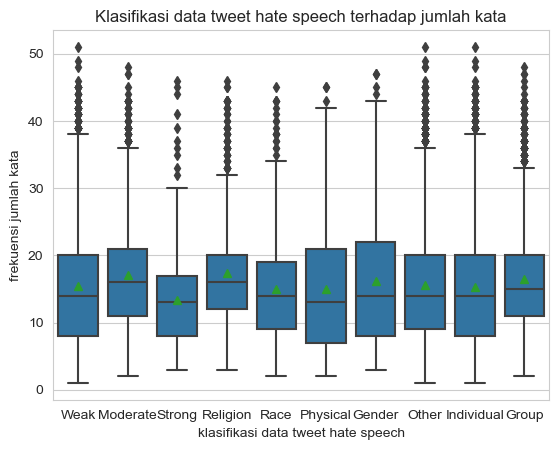

In [13]:
df_hs_religion   = df.loc[(df['HS_Religion']==1)].copy()
df_hs_race       = df.loc[(df['HS_Race']==1)].copy()
df_hs_physical   = df.loc[(df['HS_Physical']==1)].copy()
df_hs_gender     = df.loc[(df['HS_Gender']==1)].copy()
df_hs_other      = df.loc[(df['HS_Other']==1)].copy()
df_hs_individual = df.loc[(df['HS_Individual']==1)].copy()
df_hs_group      = df.loc[(df['HS_Group']==1)].copy()
df_hs_weak       = df.loc[(df['HS_Weak']==1)].copy()
df_hs_moderate   = df.loc[(df['HS_Moderate']==1)].copy()
df_hs_strong     = df.loc[(df['HS_Strong']==1)].copy()

df_hs_religion['class']='Religion'
df_hs_race['class']='Race'
df_hs_physical['class']='Physical'
df_hs_gender['class']='Gender'
df_hs_other['class']='Other'
df_hs_individual['class']='Individual'
df_hs_group['class']='Group'
df_hs_weak['class']='Weak'
df_hs_moderate['class']='Moderate'
df_hs_strong['class']='Strong'

transpose_df = pd.concat([df_hs_weak,df_hs_moderate,df_hs_strong,df_hs_religion, df_hs_race, df_hs_physical, df_hs_gender, df_hs_other,df_hs_individual,df_hs_group])
sns.set_style('whitegrid')
my_pal = {'Individual':'tab:blue', 'Group':'tab:blue', 'Religion':'tab:blue', 'Race':'tab:blue', 'Physical':'tab:blue', 'Gender':'tab:blue','Other':'tab:blue','Weak':'tab:blue', 'Moderate':'tab:blue', 'Strong':'tab:blue'}
sns.boxplot(x=transpose_df['class'], y=transpose_df['total_word'], showmeans = True, palette=my_pal)
plt.xlabel('klasifikasi data tweet hate speech')
plt.ylabel('frekuensi jumlah kata')
plt.title('Klasifikasi data tweet hate speech terhadap jumlah kata')

1 52


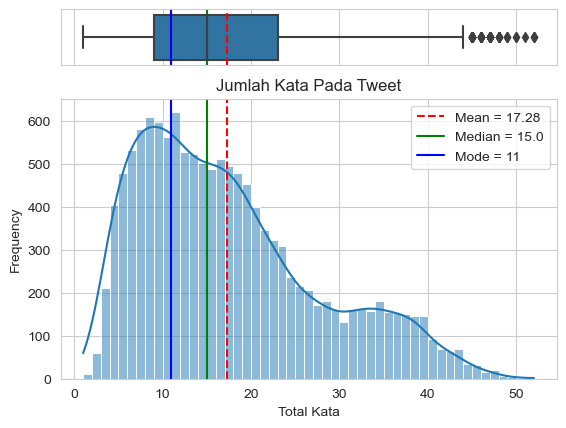

In [14]:

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['total_word'].mean()
median=df['total_word'].median()
mode=df['total_word'].mode().values[0]

sns.boxplot(data=df, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Kata")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Jumlah Kata Pada Tweet")
ax_hist.legend()
ax_box.set(xlabel='')
print(df['total_word'].min(),df['total_word'].max())

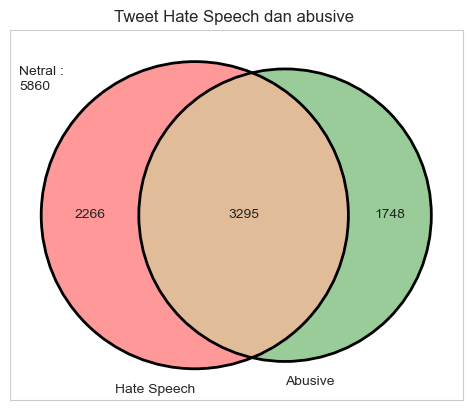

In [15]:
df_neutral    = df.loc[(df['HS']==0)&(df['Abusive']==0)]
df_hs         = df.loc[(df['HS']==1)&(df['Abusive']==0)]
df_abusive    = df.loc[(df['Abusive']==1)&(df['HS']==0)]
df_hs_abusive = df.loc[(df['HS']==1)&(df['Abusive']==1)]

v = venn2(subsets   = (len(df_hs), len(df_abusive), len(df_hs_abusive)),
      set_labels    = ('Hate Speech', 'Abusive'))
      
plt.text(-0.7,0.45,'Netral :')
plt.text(-0.7,0.4,len(df_neutral))

for text in v.set_labels:
    text.set_fontsize(10)


venn2_circles(subsets=(len(df_hs), len(df_abusive), len(df_hs_abusive)))


plt.title("Tweet Hate Speech dan abusive ")
plt.axis('on')
plt.show()

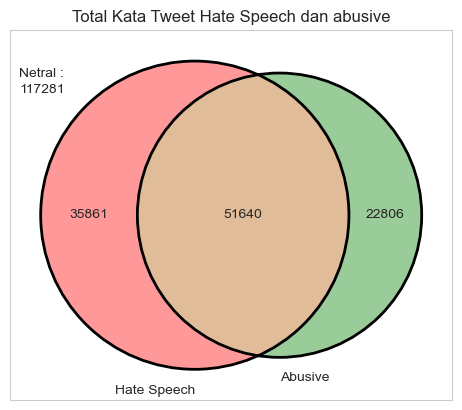

In [16]:
neutral_word = df_neutral.total_word.sum()
hs_word = df_hs.total_word.sum()
abusive_word = df_abusive.total_word.sum()
hs_abusive_word = df_hs_abusive.total_word.sum()

v = venn2(subsets   = (hs_word, abusive_word, hs_abusive_word),
      set_labels    = ('Hate Speech', 'Abusive'))

plt.text(-0.7,0.45,'Netral :')
plt.text(-0.7,0.4, neutral_word)

for text in v.set_labels:
    text.set_fontsize(10)

venn2_circles(subsets=(hs_word, abusive_word, hs_abusive_word))

plt.title("Total Kata Tweet Hate Speech dan abusive")

plt.axis('on')
plt.show()

[Text(0.5, 0, '')]

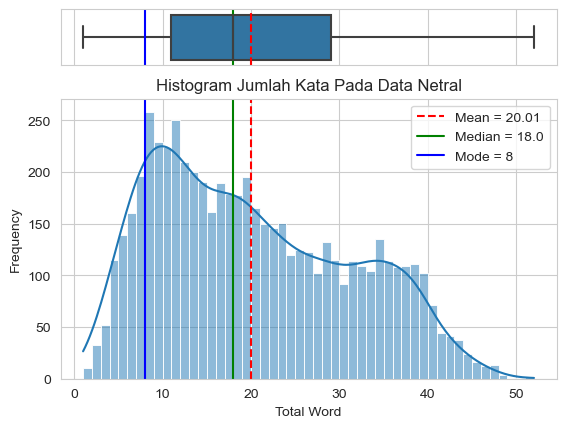

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_neutral['total_word'].mean()
median=df_neutral['total_word'].median()
mode=df_neutral['total_word'].mode().values[0]

sns.boxplot(data=df_neutral, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_neutral, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Netral")

ax_hist.legend()

ax_box.set(xlabel='')




[Text(0.5, 0, '')]

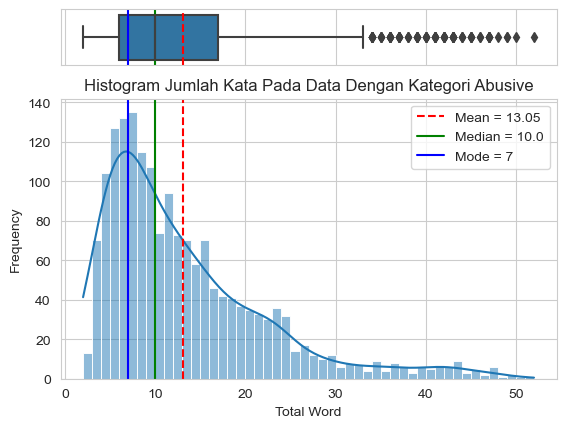

In [18]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_abusive['total_word'].mean()
median=df_abusive['total_word'].median()
mode=df_abusive['total_word'].mode().values[0]

sns.boxplot(data=df_abusive, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_abusive, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Dengan Kategori Abusive")

ax_hist.legend()

ax_box.set(xlabel='')

[Text(0.5, 0, '')]

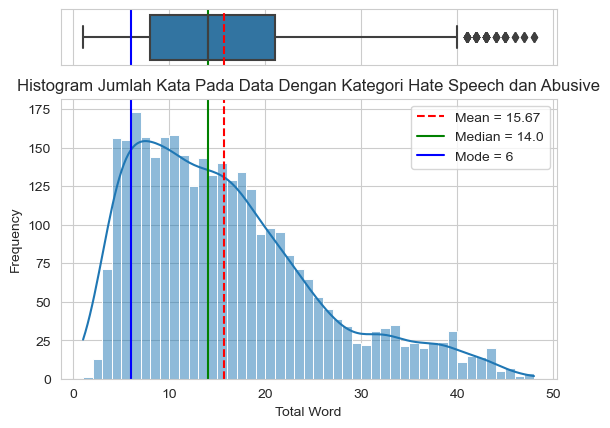

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_hs_abusive['total_word'].mean()
median=df_hs_abusive['total_word'].median()
mode=df_hs_abusive['total_word'].mode().values[0]

sns.boxplot(data=df_hs_abusive, x="total_word", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df_hs_abusive, x="total_word", ax=ax_hist, kde=True, binwidth=1)
ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean = {round(mean,2)}")
ax_hist.axvline(median, color='g', linestyle='-', label=f"Median = {median}")
ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode = {mode}")
ax_hist.set(xlabel="Total Word")
ax_hist.set(ylabel="Frequency")
ax_hist.set(title="Histogram Jumlah Kata Pada Data Dengan Kategori Hate Speech dan Abusive")

ax_hist.legend()

ax_box.set(xlabel='')

1.548339638503573

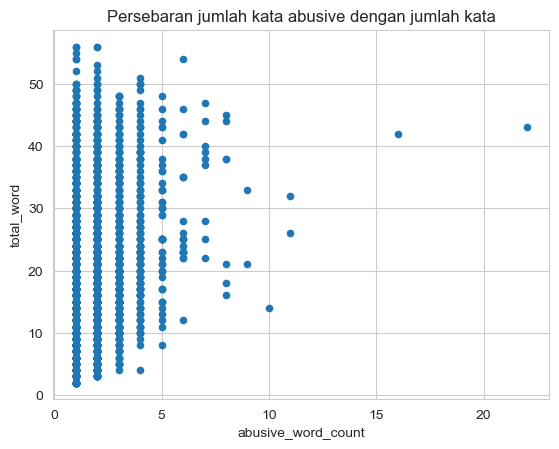

In [20]:
df_abusive_inclusive = df_w_abusive.loc[(df_w_abusive['Abusive']==1)]
def abusive_word_counter(text):
    counter = 0
    for word in text.split(' '):
        if word in abusive:
            counter = counter+1
    return counter
df_abusive_inclusive_count=df_abusive_inclusive.copy()

df_abusive_inclusive_count['abusive_word_count']=df_abusive_inclusive.Tweet.apply(abusive_word_counter)

df_abusive_inclusive_count=df_abusive_inclusive_count.loc[df_abusive_inclusive_count['abusive_word_count']!=0]

df_abusive_inclusive_count.plot(x='abusive_word_count',y='total_word', kind='scatter')
plt.title('Persebaran jumlah kata abusive dengan jumlah kata')
df_abusive_inclusive_count.abusive_word_count.mean()

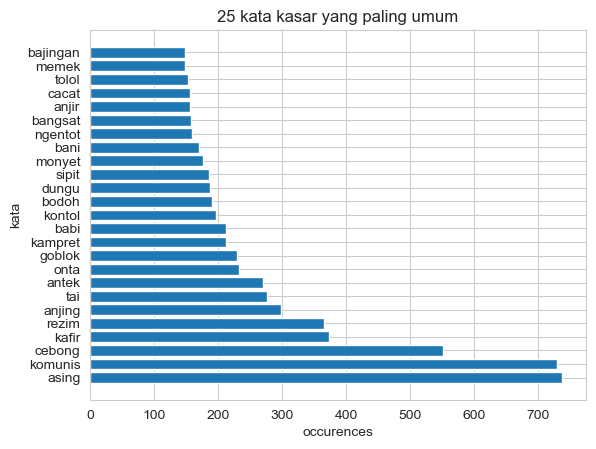

In [36]:
tweet = df_w_abusive.Tweet.str.cat(sep=" ").split(' ')
count_abusive_occurences = {}

for word in abusive:
    count_abusive_occurences[word]=tweet.count(word)
count_abusive_occurences = dict(sorted(count_abusive_occurences.items(), key=lambda item:item[1], reverse=True))

x=list(count_abusive_occurences.keys())[:25]
y=list(count_abusive_occurences.values())[:25]
plt.barh(x, y)
plt.title('25 kata kasar yang paling umum')
plt.ylabel('kata')
plt.xlabel('occurences')
plt.show()

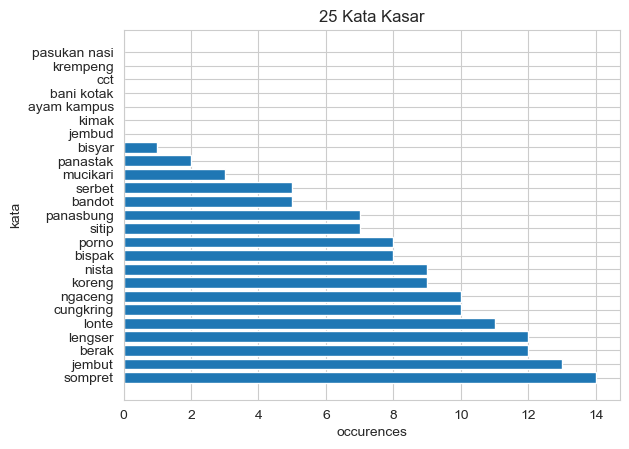

In [37]:
x=list(count_abusive_occurences.keys())[-25:]
y=list(count_abusive_occurences.values())[-25:]
plt.barh(x, y)
plt.title('25 Kata Kasar')
plt.ylabel('kata')
plt.xlabel('occurences')
plt.show()

In [23]:
#turn stop word data frame into dictionary
stop_words = abusive
#create function to get a DataFrame
def get_df(input_list, data_class):
    #remove stop words
    set_words_full = list(set(input_list))
    set_words = [i for i in set_words_full if i not in stop_words]
    
    #count each word
    count_words = [input_list.count(i) for i in set_words]
    
    #create DataFrame
    df = pd.DataFrame(zip(set_words, count_words), columns=['words','count'])
    df.sort_values('count', ascending=False, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df['class']=data_class
    return df

#create function to get a color dictionary
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d
#declare each tweet class
tweet_hs = df_hs.Tweet.str.cat(sep=" ").split(' ')
tweet_abusive = df_abusive.Tweet.str.cat(sep=" ").split(' ')
tweet_hs_abusive = df_hs_abusive.Tweet.str.cat(sep=" ").split(' ')
tweet_netral = df_neutral.Tweet.str.cat(sep=" ").split(' ')

#create df for each class
word_count_df_hs = get_df(tweet_hs, 'hs')
word_count_df_abusive = get_df(tweet_abusive, 'abusive')
word_count_df_hs_abusive = get_df(tweet_hs_abusive,'hs_abusive')
word_count_df_neutral = get_df(tweet_netral,'neutral')

#append df
word_count_all= pd.concat([word_count_df_hs[0:25],word_count_df_abusive[0:25],word_count_df_hs_abusive[0:25],word_count_df_neutral[0:25]])

#plot tree map
fig = px.treemap(word_count_all, path=[px.Constant("frekuensi kata"), 'class', 'words'],
                 values='count',
                 color='count', hover_data=['count'],
                 color_continuous_scale='viridis',
                 color_continuous_midpoint=np.average(word_count_all['count'])
                )
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig.show()

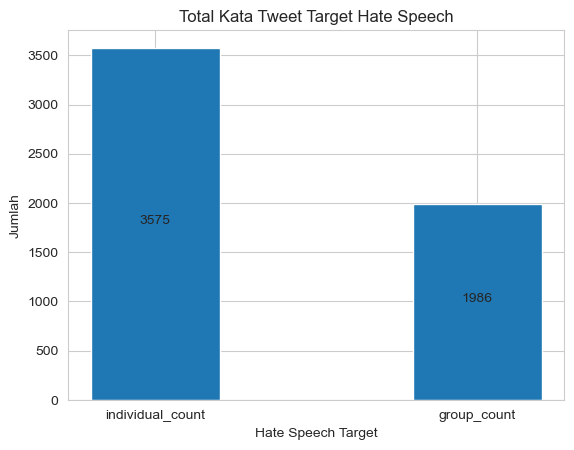

In [24]:

df_individual = df.loc[df['HS_Individual']==1]
df_group = df.loc[df['HS_Group']==1]

Target = ["individual_count", "group_count"]
Target_count = [len(df_individual),len(df_group)]

plt.bar(Target, Target_count,
        width = 0.4)
addlabels(Target, Target_count)
plt.xlabel("Hate Speech Target")
plt.ylabel("Jumlah")
plt.title("Total Kata Tweet Target Hate Speech")
plt.show()

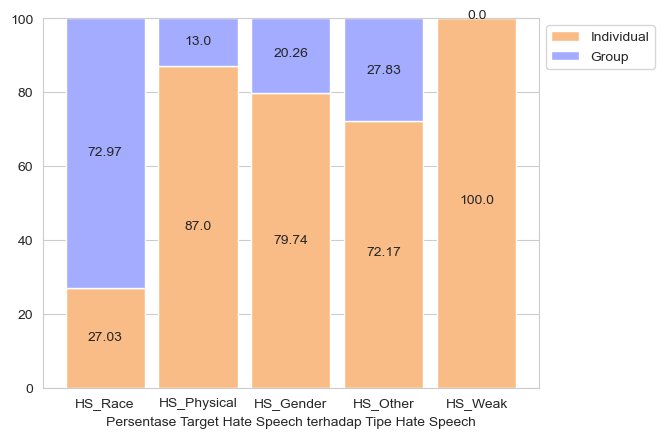

In [25]:
individual_count_type = dict(df_individual.iloc[:,6:11].sum())
group_count_type = dict(df_group.iloc[:,6:11].sum())
r = [0,1,2,3,4]

totals = [i+j for i,j in zip(individual_count_type.values(), group_count_type.values())]
individualBars = [round(i / j * 100,2) for i,j in zip(individual_count_type.values(), totals)]
groupBars = [round(i / j * 100,2) for i,j in zip(group_count_type.values(), totals)]

barWidth = 0.85
names = individual_count_type.keys()
plt.bar(r, individualBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Individual")

plt.bar(r, groupBars, bottom=individualBars, color='#a3acff', edgecolor='white', width=barWidth, label="Group")

plt.xticks(r, names)
plt.xlabel("Persentase Target Hate Speech terhadap Tipe Hate Speech")
addlabels(r, individualBars)
addlabels2(r, individualBars, groupBars)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)


plt.show()

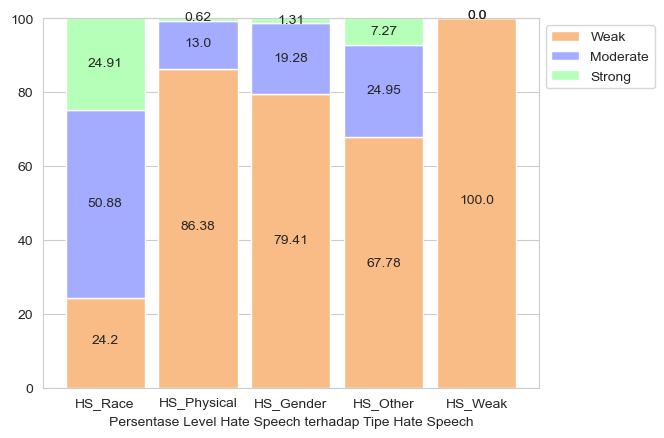

In [26]:

weak_count_type = dict(df.loc[df['HS_Weak']==1].iloc[:,6:11].sum())
moderate_count_type = dict(df.loc[df['HS_Moderate']==1].iloc[:,6:11].sum())
strong_count_type = dict(df.loc[df['HS_Strong']==1].iloc[:,6:11].sum())
r = [0,1,2,3,4]

totals = [i+j+k for i,j,k in zip(weak_count_type.values(), moderate_count_type.values(), strong_count_type.values())]
weakBars = [round(i / j * 100,2) for i,j in zip(weak_count_type.values(), totals)]
moderateBars = [round(i / j * 100,2) for i,j in zip(moderate_count_type.values(), totals)]
strongBars = [round(i / j * 100,2) for i,j in zip(strong_count_type.values(), totals)]

barWidth = 0.85
names = weak_count_type.keys()

plt.bar(r, weakBars, color='#f9bc86', edgecolor='white', width=barWidth, label="Weak")

plt.bar(r, moderateBars, bottom=weakBars, color='#a3acff', edgecolor='white', width=barWidth, label="Moderate")

plt.bar(r, strongBars, bottom=[i+j for i,j in zip(weakBars, moderateBars)], color='#b5ffb9', edgecolor='white', width=barWidth, label="Strong")

plt.xticks(r, names)
plt.xlabel("Persentase Level Hate Speech terhadap Tipe Hate Speech")

addlabels(r,weakBars)
addlabels2(r,weakBars, moderateBars)
addlabels3(r,weakBars, moderateBars, strongBars)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [27]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='black')

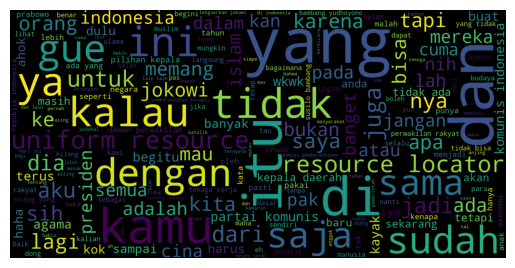

In [29]:
text =' '.join(map(str, data_baru['Tweet']))
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

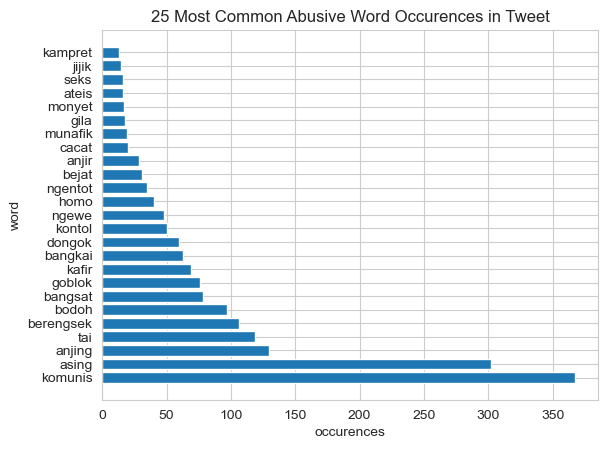

In [33]:
tweet = data_baru.Tweet.str.cat(sep=" ").split(' ')
count_abusive_occurences = {}

for word in abusive:
    count_abusive_occurences[word]=tweet.count(word)
count_abusive_occurences = dict(sorted(count_abusive_occurences.items(), key=lambda item:item[1], reverse=True))

x=list(count_abusive_occurences.keys())[:25]
y=list(count_abusive_occurences.values())[:25]
plt.barh(x, y)
plt.title('25 Most Common Abusive Word Occurences in Tweet')
plt.ylabel('word')
plt.xlabel('occurences')
plt.show()